# Visualización de los datos

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [14]:
file = '../data/raw/dataset.csv'
data = pd.read_csv(file, delimiter=';');
data

,#time,R4_Windgeschwindigkeit_B4_1Hz.Mean,R4_Windgeschwindigkeit_B4_1Hz.Stddev,R4_Windgeschwindigkeit_B4_1Hz.Min,R4_Windgeschwindigkeit_B4_1Hz.Max,R4_Windgeschwindigkeit_B4_1Hz.NVal,R4_Windgeschwindigkeit_B4_1Hz.Flag,R4_Windgeschwindigkeit_B4_1Hz.Detailed_Flag,R4_Windgeschwindigkeit_B4_1Hz.A4,R4_Windgeschwindigkeit_B4_1Hz.A3,...,R4_Azimutwinkel_B4_50Hz.Min,R4_Azimutwinkel_B4_50Hz.Max,R4_Azimutwinkel_B4_50Hz.NVal,R4_Azimutwinkel_B4_50Hz.Flag,R4_Azimutwinkel_B4_50Hz.Detailed_Flag,R4_Azimutwinkel_B4_50Hz.A4,R4_Azimutwinkel_B4_50Hz.A3,R4_Azimutwinkel_B4_50Hz.A2,R4_Azimutwinkel_B4_50Hz.A1,R4_Azimutwinkel_B4_50Hz.A0
0,2017-01-01 00:00:00,nan,nan,nan,nan,"0,0",0,0,nan,nan,...,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan
1,2017-01-01 00:00:00.005000,"13,5254","1,0684","9,77035","17,2249","600,0",0,0,"0,0","0,0",...,"110,316","122,384","30000,0",0,0,"0,0","0,0","0,0","1,0","0,0"
2,2017-01-01 00:10:00,nan,nan,nan,nan,"0,0",0,0,nan,nan,...,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan
3,2017-01-01 00:10:00.005000,"13,4771","1,00513","10,4668","17,6138","600,0",0,0,"0,0","0,0",...,"110,316","123,549","30000,0",0,0,"0,0","0,0","0,0","1,0","0,0"
4,2017-01-01 00:20:00,nan,nan,nan,nan,"0,0",0,0,nan,nan,...,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470899,2020-12-31 23:10:00,"2,68048421662684","0,306436110110995","1,642810855","3,42661718",600,1,10000999999999,"0,0","0,0",...,"327,460173798747","354,639773958072",30000,1,10000999999999,"0,0","0,0","0,0","36,3507851","31,32456292"
470900,2020-12-31 23:20:00,"2,32496064047232","0,301026550351038","1,64067456","3,1264677325",600,1,10000999999999,"0,0","0,0",...,"319,328481179655","351,63337736902",30000,1,10000999999999,"0,0","0,0","0,0","36,3507851","31,32456292"
470901,2020-12-31 23:30:00,"2,06878018968057","0,404823624110351","1,2443918375","3,32834761",600,1,10000999999999,"0,0","0,0",...,"322,323784054352","351,63337736902",30000,1,10000999999999,"0,0","0,0","0,0","36,3507851","31,32456292"
470902,2020-12-31 23:40:00,"2,17874156366205","0,426904890506023","1,2443918375","3,232214335",600,1,10000999999999,"0,0","0,0",...,"319,3173874653","322,368158911755",30000,1,10000999999999,"0,0","0,0","0,0","36,3507851","31,32456292"


## Información y comprensión de los datos

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470904 entries, 0 to 470903
Data columns (total 49 columns):
 #   Column                                          Non-Null Count   Dtype 
---  ------                                          --------------   ----- 
 0   #time                                           470904 non-null  object
 1    R4_Windgeschwindigkeit_B4_1Hz.Mean             470904 non-null  object
 2    R4_Windgeschwindigkeit_B4_1Hz.Stddev           470904 non-null  object
 3    R4_Windgeschwindigkeit_B4_1Hz.Min              470904 non-null  object
 4    R4_Windgeschwindigkeit_B4_1Hz.Max              470904 non-null  object
 5    R4_Windgeschwindigkeit_B4_1Hz.NVal             470904 non-null  object
 6    R4_Windgeschwindigkeit_B4_1Hz.Flag             470904 non-null  int64 
 7    R4_Windgeschwindigkeit_B4_1Hz.Detailed_Flag    470904 non-null  int64 
 8    R4_Windgeschwindigkeit_B4_1Hz.A4               470904 non-null  object
 9    R4_Windgeschwindigkeit_B4_1Hz.A3    

Se fuerza el data type.

In [18]:
# La columna tiempo se fuerza al tipo datatime
data['#time'] = data['#time'].astype('datetime64[ns]',errors='ignore')

# Las demás columnas que son object se fuerzan al tipo float64
columns = data.columns[data.dtypes=='object']
for i in columns:
       data[i] = data[i].str.replace(' ','')
       data[i] = data[i].str.replace(',','.')
       data[i] = data[i].astype('float64',errors='ignore')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470904 entries, 0 to 470903
Data columns (total 49 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   #time                                           470904 non-null  datetime64[ns]
 1    R4_Windgeschwindigkeit_B4_1Hz.Mean             355464 non-null  float64       
 2    R4_Windgeschwindigkeit_B4_1Hz.Stddev           355464 non-null  float64       
 3    R4_Windgeschwindigkeit_B4_1Hz.Min              355464 non-null  float64       
 4    R4_Windgeschwindigkeit_B4_1Hz.Max              355464 non-null  float64       
 5    R4_Windgeschwindigkeit_B4_1Hz.NVal             438136 non-null  float64       
 6    R4_Windgeschwindigkeit_B4_1Hz.Flag             470904 non-null  int64         
 7    R4_Windgeschwindigkeit_B4_1Hz.Detailed_Flag    470904 non-null  int64         
 8    R4_Windgeschwindigkeit_B4_1Hz.A4 

Se realiza un pequeño reporte de las columnas, con sus tipos, % de missings y cardinalidad, que resultará muy útil a lo largo de la analítica.

In [19]:
def data_report(data):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(data.columns.values, columns=["COLUMNS"])

    # Sacamos los TIPOS
    types = pd.DataFrame(data.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(data.isnull().sum() * 100 / len(data), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(data.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(data), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COLUMNS', drop=True, inplace=True)

    return concatenado.T
        
data_report(data)

COLUMNS,#time,R4_Windgeschwindigkeit_B4_1Hz.Mean,R4_Windgeschwindigkeit_B4_1Hz.Stddev,R4_Windgeschwindigkeit_B4_1Hz.Min,R4_Windgeschwindigkeit_B4_1Hz.Max,R4_Windgeschwindigkeit_B4_1Hz.NVal,R4_Windgeschwindigkeit_B4_1Hz.Flag,R4_Windgeschwindigkeit_B4_1Hz.Detailed_Flag,R4_Windgeschwindigkeit_B4_1Hz.A4,R4_Windgeschwindigkeit_B4_1Hz.A3,...,R4_Azimutwinkel_B4_50Hz.Min,R4_Azimutwinkel_B4_50Hz.Max,R4_Azimutwinkel_B4_50Hz.NVal,R4_Azimutwinkel_B4_50Hz.Flag,R4_Azimutwinkel_B4_50Hz.Detailed_Flag,R4_Azimutwinkel_B4_50Hz.A4,R4_Azimutwinkel_B4_50Hz.A3,R4_Azimutwinkel_B4_50Hz.A2,R4_Azimutwinkel_B4_50Hz.A1,R4_Azimutwinkel_B4_50Hz.A0
DATA_TYPE,datetime64[ns],float64,float64,float64,float64,float64,int64,int64,float64,float64,...,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64
MISSINGS (%),0.0,24.51,24.51,24.51,24.51,6.96,0.0,0.0,24.51,24.51,...,25.17,25.17,6.96,0.0,0.0,25.17,25.17,25.17,25.17,25.17
UNIQUE_VALUES,235684,165363,164752,19126,29505,3,2,14,1,1,...,24060,24073,19,2,23,1,1,1,4,5
CARDIN (%),50.05,35.12,34.99,4.06,6.27,0.0,0.0,0.0,0.0,0.0,...,5.11,5.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualicación

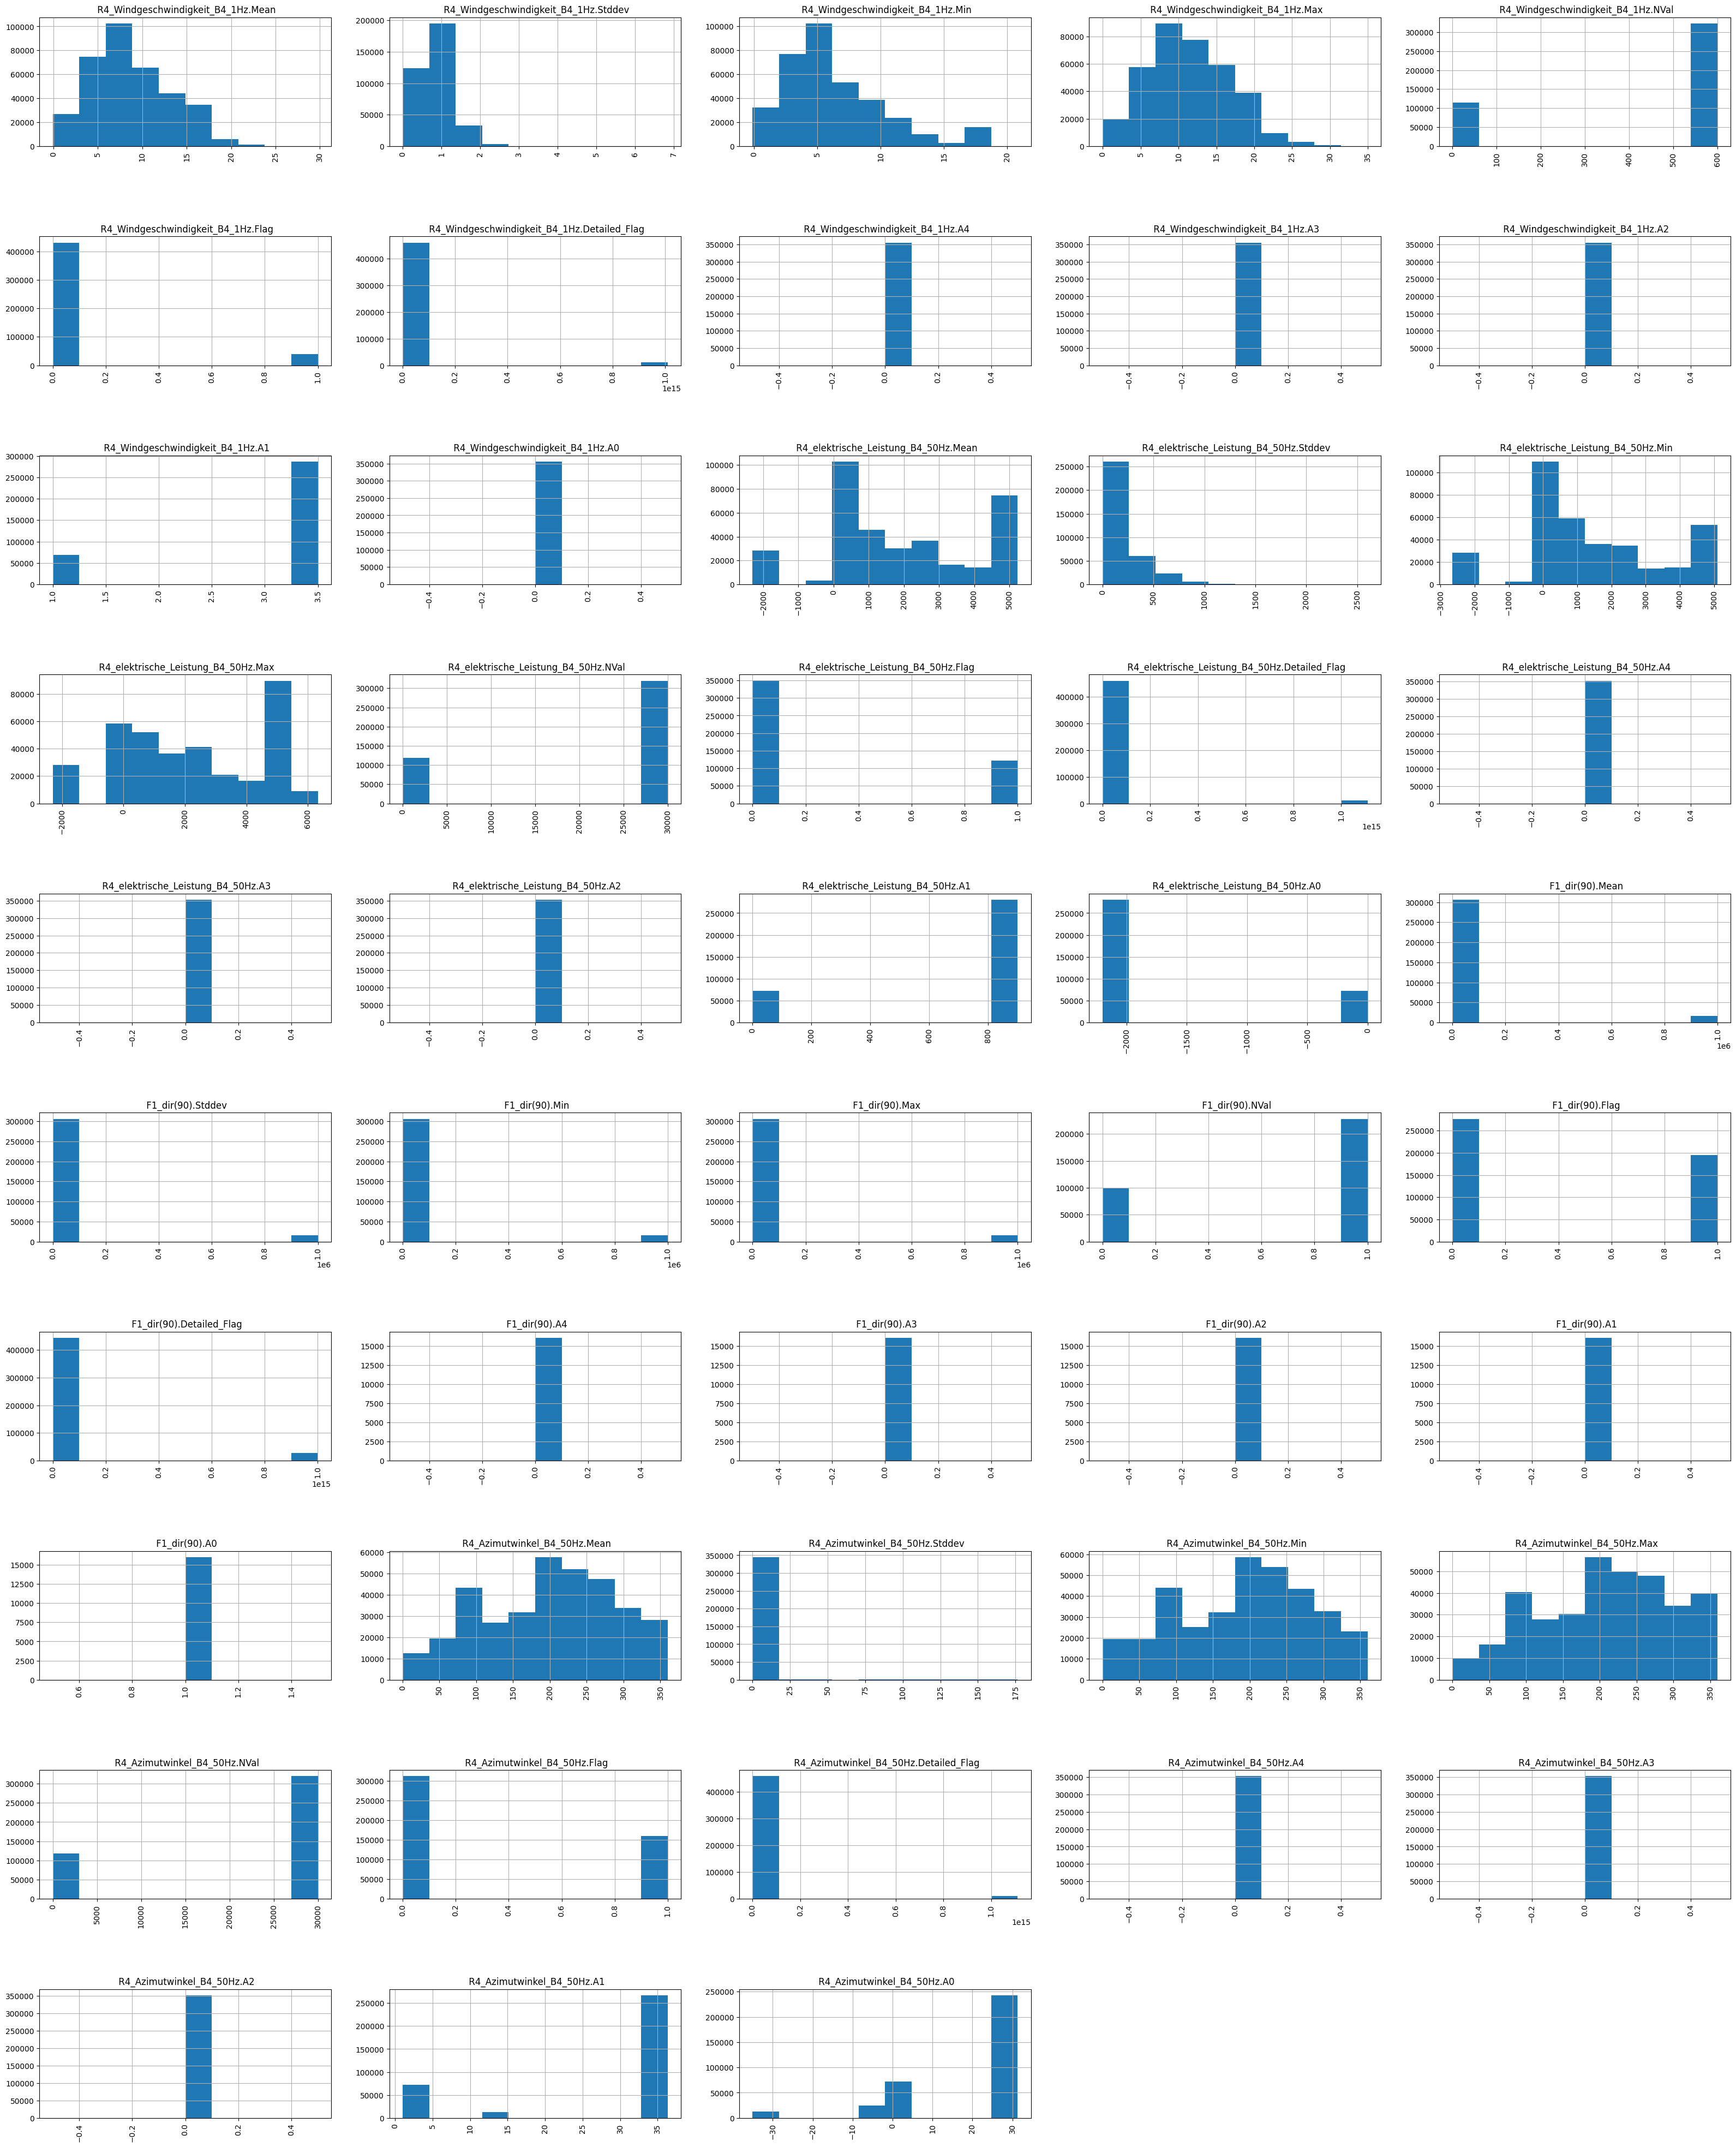

In [20]:
fig = plt.figure(figsize=(40, 50))
cols = 5
rows = int(np.ceil(float(data.shape[1]) / cols))
for i, column in enumerate(data.columns[1:]):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [23]:
data.to_csv('../data/processed/data.csv', index=False)